In [85]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

In [70]:
netflix_data = pd.read_csv('netflix_titles.csv')

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [72]:
netflix_data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [73]:
netflix_data['country'].fillna(netflix_data.country.mode()[0], inplace=True)
netflix_data['cast'].replace(np.nan, 'No Data', inplace=True)
netflix_data['director'].replace(np.nan, 'No Data', inplace=True)
netflix_data.dropna(inplace=True)

In [74]:
netflix_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [75]:
netflix_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8790, dtype: bool

In [76]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [77]:
netflix_data.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3023,s3024,Movie,Eye For An Eye,Paco Plaza,"Luis Tosar, Xan Cejudo, Ismael Martínez, Enric...","Spain, France, United States",2020-01-15,2019,TV-MA,108 min,"Dramas, International Movies, Thrillers",A cartel boss is released from prison and unkn...
2219,s2220,Movie,The Remix: Hip Hop X Fashion,"Lisa Cortés, Farah X",No Data,United States,2020-07-22,2019,TV-MA,67 min,"Documentaries, Music & Musicals",This documentary profiles Black visionaries in...
120,s121,TV Show,Heroes of Goo Jit Zu,No Data,"Jon Allen, Kellen Goff, Joe Hernandez, Kaiji Tang",Australia,2021-09-02,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies","After a meteor crash, a group of zoo animals t..."
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",United States,2021-06-02,2017,TV-PG,212 min,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
7907,s7908,Movie,Russell Madness,Robert Vince,"David Milchard, John Ratzenberger, Will Sasso,...",United States,2015-05-10,2015,PG,93 min,"Children & Family Movies, Comedies, Sports Movies",A spunky terrier named Russell with serious wr...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
4635,s4636,TV Show,Al Hayba,No Data,"Taim Hasan, Nadine Nassib Njeim, Abdo Chahine,...",Lebanon,2018-09-15,2017,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a village by the Lebanon-Syria border, the ..."
3804,s3805,Movie,The Man Who Feels No Pain,Vasan Bala,"Abhimanyu Dassani, Radhika Madan, Gulshan Deva...",India,2019-05-22,2018,TV-14,137 min,"Action & Adventure, Comedies, International Mo...","Leveraging his ability to withstand pain, a yo..."
5920,s5921,Movie,BoJack Horseman Christmas Special: Sabrina's C...,No Data,"Will Arnett, Aaron Paul, Alison Brie, Adam Con...",United States,2014-12-19,2014,TV-MA,26 min,Movies,"It's Christmas, and BoJack wants nothing to do..."
8215,s8216,Movie,The Bomb,"Kevin Ford, Smriti Keshari, Eric Schlosser",No Data,United States,2017-08-01,2016,TV-14,59 min,Documentaries,"Form, montage and mesmerizing kinetics propel ..."


In [78]:
netflix_data.nunique(axis=0)

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          748
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

In [79]:
netflix_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [80]:
netflix_data.country.unique()

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [81]:
netflix_data.rename(columns={'listed_in':'gender'}, inplace=True)

In [82]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,gender,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<AxesSubplot: ylabel='Frequency'>

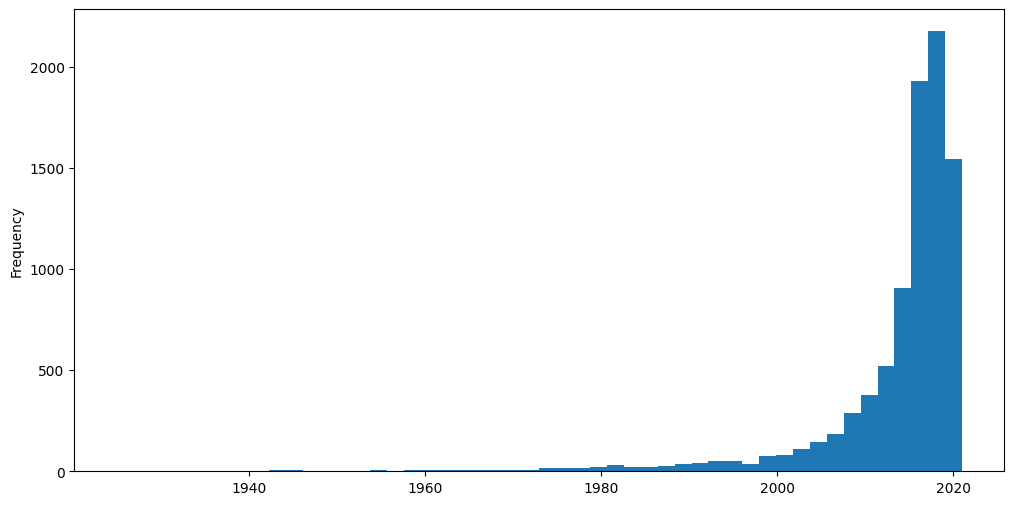

In [88]:
netflix_data['release_year'].plot(kind='hist', figsize=(12,6), bins=50)

In [91]:
netflix_data['date_added'].dtype

dtype('<M8[ns]')